##K-MEANS CLUSTERING

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Customer (1).csv')

data.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [2]:
X = data.iloc[:, 2:5]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X

,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,23,87,29
1,60,4,30
2,21,73,30
3,53,4,33
4,18,92,33
...,...,...,...
195,28,75,87
196,36,10,87
197,36,92,87
198,52,13,88


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

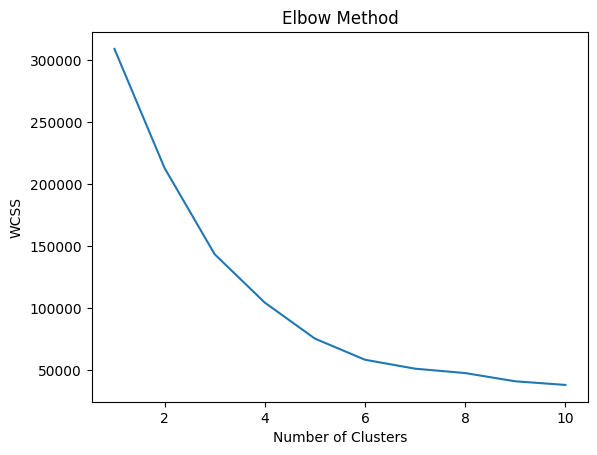

In [3]:
#metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [4]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(X_scaled)
data['Cluster'] = cluster

print(data['Cluster'].value_counts())

Cluster
1    91
2    68
0    41
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


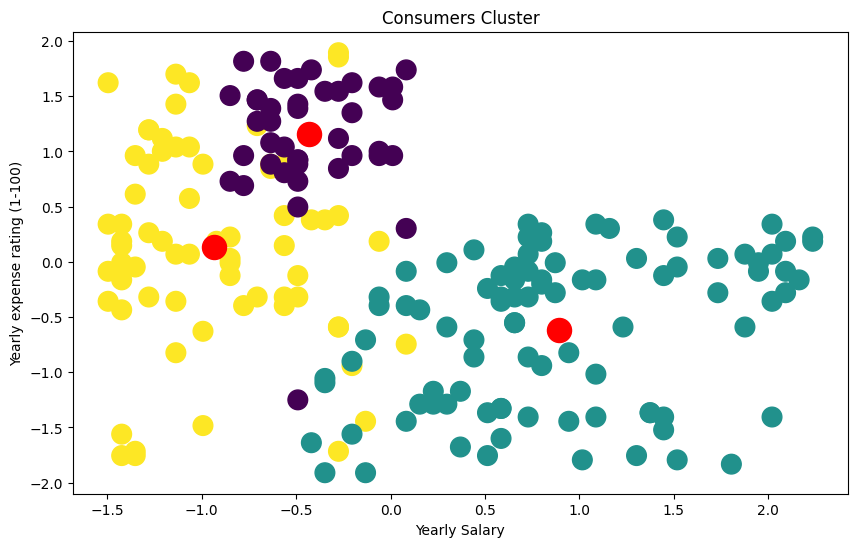

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster, s=200)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300)

plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.show()

##HIERACHICAL CLUSTERING

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Customer (1).csv')

data.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [11]:
X = data.iloc[:, 2:5]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X

,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,23,87,29
1,60,4,30
2,21,73,30
3,53,4,33
4,18,92,33
...,...,...,...
195,28,75,87
196,36,10,87
197,36,92,87
198,52,13,88


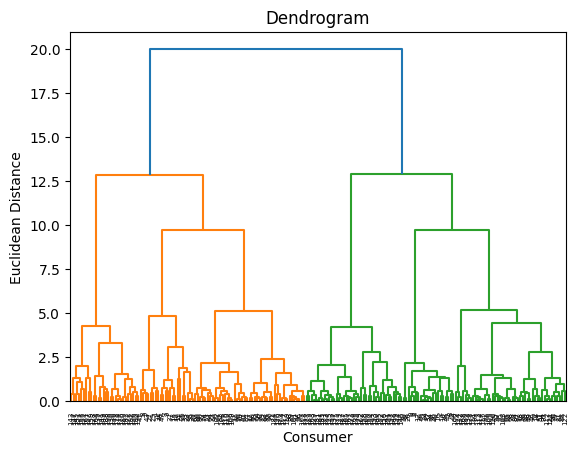

In [12]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

In [13]:
#analisa hierachical
n_clusters = 3
hierarchical_clusters = fcluster(Z, n_clusters, criterion='maxclust')
data['Hierarchical_Cluster'] = hierarchical_clusters

print(data.head())
for i in range(1, n_clusters + 1):
    print(f'\nHierarchical Cluster {i}')
    print(data[data['Hierarchical_Cluster'] == i].describe())

   IDPelanggan    Kelamin  Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
0            1  Perempuan    23                      87                    29   
1            2       Laki    60                       4                    30   
2            3  Perempuan    21                      73                    30   
3            4       Laki    53                       4                    33   
4            5       Laki    18                      92                    33   

   Hierarchical_Cluster  
0                     3  
1                     1  
2                     3  
3                     1  
4                     3  

Hierarchical Cluster 1
       IDPelanggan       Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
count    95.000000  95.000000               95.000000             95.000000   
mean     95.431579  49.915789               32.515789             59.063158   
std      57.145885  11.298336               17.679693             26.758101   
min       2.00000

In [14]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

data['KMeans_Cluster'] = kmeans_clusters

for i in range(n_clusters):
    print(f'\nK-Means Cluster {i}')
    print(data[data['KMeans_Cluster'] == i].describe())


K-Means Cluster 0
       IDPelanggan       Usia  Rating_belanja (1-100)  Pendapatan (juta Rp)  \
count    41.000000  41.000000               41.000000             41.000000   
mean    161.341463  32.853659               79.975610             87.341463   
std      22.918998   3.811568               13.997299             17.985563   
min     123.000000  27.000000               18.000000             69.000000   
25%     143.000000  30.000000               74.000000             75.000000   
50%     162.000000  32.000000               83.000000             79.000000   
75%     180.000000  36.000000               90.000000             97.000000   
max     200.000000  40.000000               97.000000            137.000000   

       Hierarchical_Cluster  KMeans_Cluster  
count             41.000000            41.0  
mean               2.000000             0.0  
std                0.223607             0.0  
min                1.000000             0.0  
25%                2.000000            

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


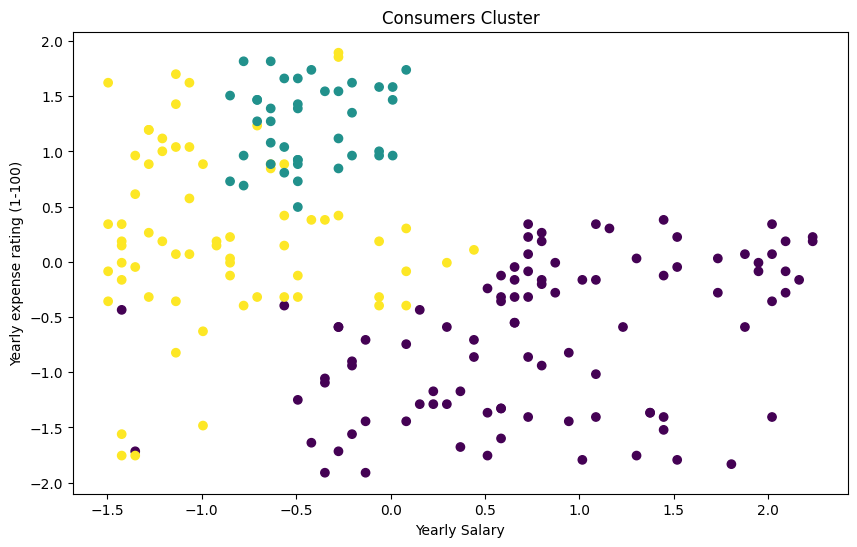

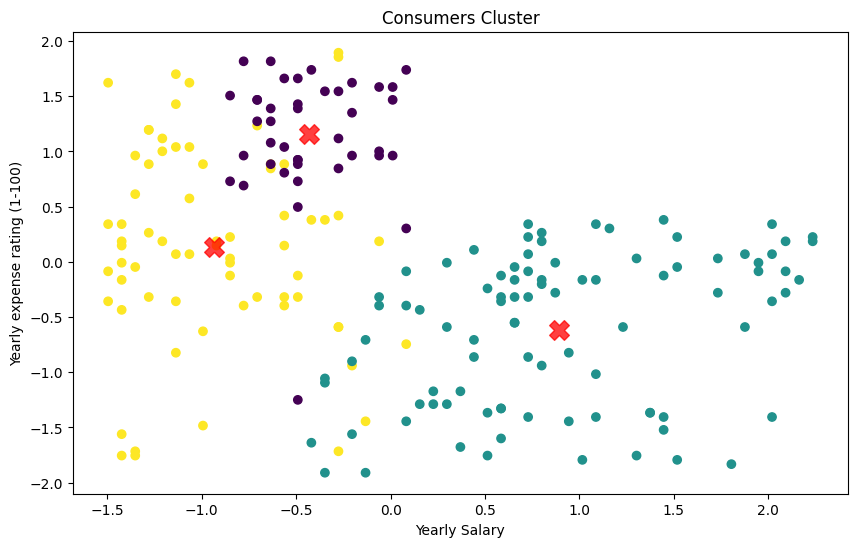

In [15]:
# Perbandingan hierarchical dan k-means
plt.figure(figsize=(10, 6))
plt.scatter(x=X_scaled[:, 0], y=X_scaled[:, 1], c=data['Hierarchical_Cluster'], cmap='viridis')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.show()

# Membuat scatter plot hasil K-Means clustering dengan centroid
plt.figure(figsize=(10, 6))
plt.scatter(x=X_scaled[:, 0], y=X_scaled[:, 1], c=data['KMeans_Cluster'], cmap='viridis')

# Plot titik centroid K-Means
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.show()